In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  # to save model


In [1]:
# CELL 1: Upload heart.csv, load into pandas, and show the first 5 rows and info.
from google.colab import files
import pandas as pd
import io

print("STEP 1: Click the 'Choose Files' button that appears to upload heart.csv from your computer.")
uploaded = files.upload()   # click Choose Files and select the heart.csv you downloaded

# After upload, load into DataFrame
fn = list(uploaded.keys())[0]
print("Loaded file:", fn)

df = pd.read_csv(io.BytesIO(uploaded[fn]))
print("\n===== FIRST 5 ROWS (df.head()) =====")
display(df.head())

print("\n===== DATAFRAME INFO (df.info()) =====")
print(df.info())


STEP 1: Click the 'Choose Files' button that appears to upload heart.csv from your computer.


Saving heart.csv to heart.csv
Loaded file: heart.csv

===== FIRST 5 ROWS (df.head()) =====


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



===== DATAFRAME INFO (df.info()) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['chol'].plot(kind='hist', bins=20, title='chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sex', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='chol', y='fbs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cp']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('cp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cp')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cp']
  ys = series['sex']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('cp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cp')
_ = plt.ylabel('sex')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cp']
  ys = series['trestbps']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('cp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cp')
_ = plt.ylabel('trestbps')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cp']
  ys = series['chol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('cp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cp')
_ = plt.ylabel('chol')

from matplotlib import pyplot as plt
_df_12['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['chol'].plot(kind='line', figsize=(8, 4), title='chol')
plt.gca().spines[['top', 'right']].set_visible(False)

In [2]:
# CELL 2: Check for missing values and percent with heart disease
print("Missing values per column:")
print(df.isna().sum())

pct_disease = df['target'].mean() * 100
print(f"\nPercentage of records with heart disease (target==1): {pct_disease:.2f}%")


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Percentage of records with heart disease (target==1): 51.32%


##Week 2: Data Cleaning and Exploration

In [3]:
# STEP 2: Data Cleaning

# Check for missing or duplicate rows
print("Missing values:\n", df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Basic sanity checks
print("\nSummary statistics:")
display(df.describe())

# Check for impossible values (example: negative cholesterol, etc.)
for col in ['age', 'chol', 'trestbps', 'thalach']:
    bad = df[df[col] <= 0]
    if len(bad) > 0:
        print(f"Column {col} has invalid values!")


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate rows: 723

Summary statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# STEP 3: Quick frequency summaries for key variables

# What % of patients are male/female?
sex_counts = df['sex'].value_counts(normalize=True) * 100
print("\nSex distribution (%):")
print(sex_counts)

# Chest pain type
print("\nChest Pain Type distribution:")
print(df['cp'].value_counts())

# Correlation matrix (how related variables are)
print("\nCorrelation with 'target':")
print(df.corr()['target'].sort_values(ascending=False))



Sex distribution (%):
sex
1    68.211921
0    31.788079
Name: proportion, dtype: float64

Chest Pain Type distribution:
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

Correlation with 'target':
target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


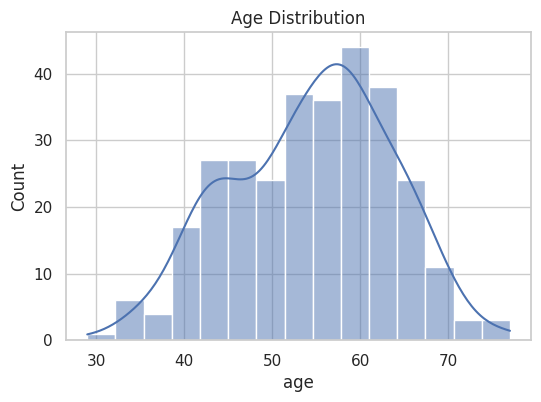

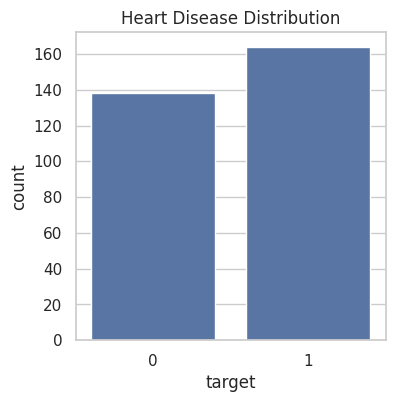

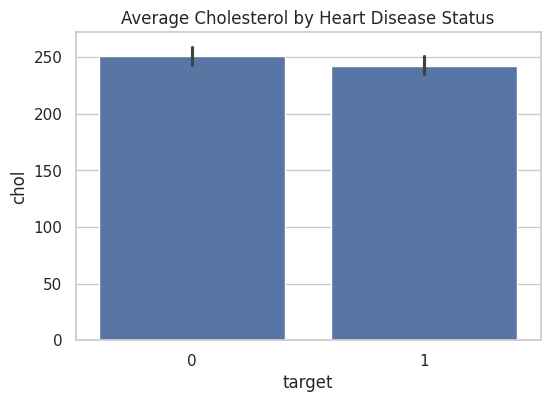

In [5]:
# STEP 4: Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

# 2. Target counts (0 = no disease, 1 = disease)
plt.figure(figsize=(4,4))
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

# 3. Average cholesterol by target group
plt.figure(figsize=(6,4))
sns.barplot(x='target', y='chol', data=df)
plt.title("Average Cholesterol by Heart Disease Status")
plt.show()


If certain health factors (like high cholestrol or high blood pressure) predict heart disease, that information can help hospitals or insurance companies plan resource spending.

In [6]:
# Rough simulation idea:
# Let's assume each patient with heart disease costs $20,000 in treatment
# and each without costs $5,000.

df['estimated_cost'] = df['target'].apply(lambda x: 20000 if x==1 else 5000)
avg_cost = df['estimated_cost'].mean()
print(f"Estimated average patient cost: ${avg_cost:,.2f}")


Estimated average patient cost: $13,145.70


In [8]:
df = pd.read_csv('heart.csv')  # load the CSV file into a table
df.head()  # show first 5 rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
X = df.drop('target', axis=1)
y = df['target']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 820
Testing samples: 205


In [12]:
print("Percentage of people with heart disease:", y.mean()*100)


Percentage of people with heart disease: 51.31707317073171


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib


In [14]:
# Create the model object
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [15]:
y_pred = logreg.predict(X_test)  # model predicts 0 or 1 for each test sample
y_prob = logreg.predict_proba(X_test)[:,1]  # probability of heart disease (0-100%)


In [16]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8146341463414634
Precision: 0.7637795275590551
Recall: 0.9238095238095239
F1 Score: 0.8362068965517241
Confusion Matrix:
 [[70 30]
 [ 8 97]]


In [17]:
coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df)


     Feature  Coefficient
2         cp     0.844776
10     slope     0.563922
6    restecg     0.302432
7    thalach     0.018761
4       chol    -0.005208
0        age    -0.011642
3   trestbps    -0.020254
5        fbs    -0.049810
9    oldpeak    -0.527378
11        ca    -0.726152
12      thal    -0.819558
8      exang    -1.032491
1        sex    -1.604382


In [18]:
joblib.dump(logreg, 'logreg_model.pkl')


['logreg_model.pkl']

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [20]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)


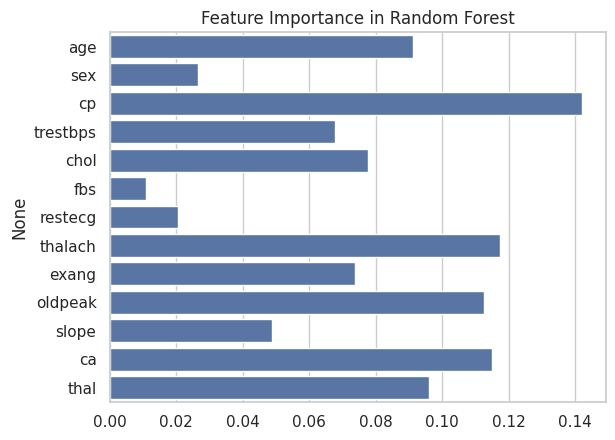

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_model.feature_importances_
sns.barplot(x=feature_importances, y=X_train.columns)
plt.title("Feature Importance in Random Forest")
plt.show()


In [24]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")


['rf_model.pkl']